# REGRESIÓN LINEAL

Vamos a utilizar la regresión lineal para ver qué característica de los coches influye más en la emisión de CO2.

Son necesarias las siguientes bibliotecas:
 - NumPy
 - Matplotlib
 - Pandas
 - Scikit-learn



## Importamos las librerías (excepto Scikit-learn)


In [ ]:
# Importamos la biblioteca NumPy, que se usa para trabajar con arrays y operaciones matemáticas
import numpy as np

# Importamos Matplotlib, una biblioteca para crear gráficos y visualizaciones
import matplotlib.pyplot as plt

# Importamos Pandas, que se utiliza para manejar y analizar datos en forma de tablas (DataFrames)
import pandas as pd

## Cargamos los datos
Están en un csv al que accedemos mediante una URL (dirección de internet).


In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
# Leemos el csv y lo guardamos en la variable df
df=pd.read_csv(url)

In [ ]:
# Comprobamos que se ha cargado bien. En este caso usamos sample que nos elegirá 5 registros aleatorios.
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
755,2014,MERCEDES-BENZ,G 63 AMG,SUV - STANDARD,5.5,8,AS7,Z,19.4,15.7,17.7,16,407
275,2014,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28,232
226,2014,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,4.8,8,A6,X,21.3,14.3,18.2,16,419
303,2014,DODGE,CHARGER,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,237
157,2014,CADILLAC,ATS,COMPACT,2.0,4,M6,Z,12.1,7.9,10.2,28,235



## Tratamos de entender los datos

### `FuelConsumption.csv`:
Vamos a usar un dataset llamado FuelConsumption.
Contiene registros por modelo de coche sobre el consumo de combustible y estimaciones de emisiones de dióxido de carbono para vehículos destinados a la venta en Canadá.

[Fuente del Dataset](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

Contiene las siguientes variables:

- **MODEL YEAR** ej. 2014
- **MAKE** ej. VOLVO
- **MODEL** ej. S60 AWD
- **VEHICLE CLASS** ej. COMPACT
- **ENGINE SIZE** ej. 3.0
- **CYLINDERS** ej. 6
- **TRANSMISSION** ej. AS6
- **FUEL TYPE** ej. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** ej. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** ej. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** ej. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** ej. 25
- **CO2 EMISSIONS (g/km)** ej. 182

Nuestra tarea es crear un modelo de regresión simple usando una de las características para predecir su impacto en las emisiones de CO2.

### Explorar los datos
Vamos a revisar algunas variables estadísticas.
Con "describe" tendremos un resumen de:
- Count: número de registros
- Mean: media
- Std: Desviación típica
- Min: Valor mínimo
- 25%: Primer cuartil
- 50%: Mediana o segundo cuartil
- 75%: Tercer cuartil
- Max: Valor máximo


In [ ]:
# Usamos describe para conocer los estadísticos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Puedes ver en las estadísticas que el 75% de los autos tienen un consumo de combustible de hasta casi tres veces el del auto más eficiente (min), con valores respectivos de 31 MPG y 11 MPG.

El vehículo con el mayor consumo de combustible, con 60 MPG, parece sospechosamente alto, pero podría ser un valor correcto.

La variable MODELYEAR tiene una desviación estándar de 0, por lo tanto, no aporta información interesante. Todos son del 2014.

### Seleccionamos características
Vamos a seleccionar algunas de las características que puedan estar relacionadas con las emisiones de CO2:
- ENGINESIZE: Tamaño del motor
- CYLINDERS: Cilindrada
- FUELCONSUMPTION_COMB: Consumo de combustible (teniendo en cuenta ciudad y autovía y en litro por km).
- CO2EMISSIONS:Emisiones de CO2


In [ ]:
# Seleccionamos solo estas columnas del dataframe df y lo guardamos en una nueva variable llamada cdf
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
# Vamos a ver un ejemplo de 9 registros de este nuevo dataframe cdf
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
632,2.4,4,10.7,246
569,2.4,4,9.5,218
992,2.5,4,9.5,218
385,3.7,6,13.4,308
642,5.0,8,21.4,342
753,5.5,8,13.5,310
431,2.5,4,10.4,239
24,2.0,4,9.3,214
647,5.0,8,14.7,338


### Visualicemos algunas estadísticas.
Vamos a ver los histogramas de cada una de estas características.


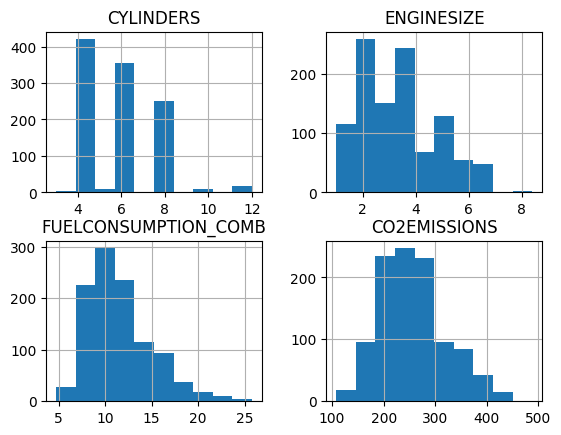

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

Como puedes ver, la mayoría de los motores tienen 4, 6 o 8 cilindros, y tamaños de motor entre 2 y 4 litros.
Como era de esperarse, el consumo de combustible combinado y las emisiones de CO₂ tienen distribuciones muy similares.
Ahora, vamos a ver algunos diagramas de dispersión de estas características frente a las emisiones de CO₂, para ver si sus relaciones son lineales.


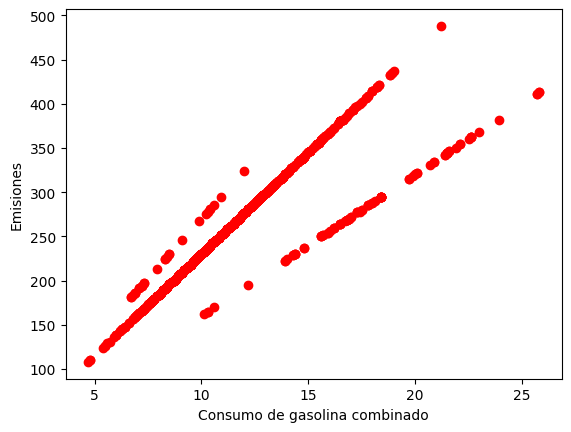

In [ ]:
# Vamos a comparar las variables consumo de gasolina y la de emisiones de CO2.
# Para realizar un diagrama de dispersión, utilizaremos la palabra scatter, indicamos el dataframe, un punto y la variable. Lo hacemos de color rojo.
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
# Indicamos el nombre de la variable x (título que aparecerá abajo)
plt.xlabel("Consumo de gasolina combinado")
# Indicamos el nombre de la variable y (título que aparecerá en el lateral izquierdo)
plt.ylabel("Emisiones")
plt.show()

Este gráfico nos aporta informaición. Hay tres grupos de autos que presentan cada uno una fuerte relación lineal entre su consumo de combustible y sus emisiones de CO₂.
Sus intersecciones son similares, mientras que sus pendientes difieren notablemente.

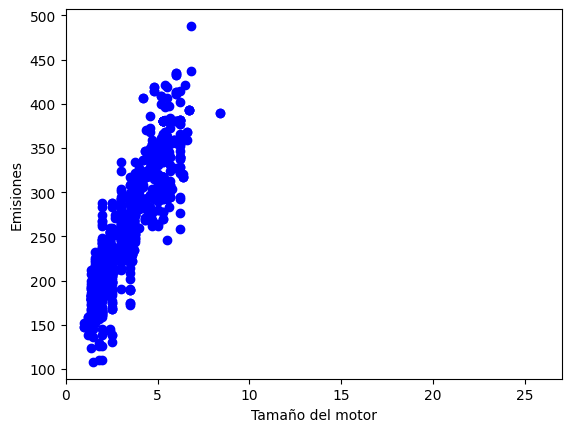

In [ ]:
# Hacemos lo mismo con el tamaño del motor y las emisiones de CO2, en este caso en azul.
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisiones")
# Indicamos que los límites del eje x sean 0 y 27.
plt.xlim(0,27)
plt.show()

Aunque la relación entre el tamaño del motor y las emisiones de CO₂ es bastante lineal, puedes ver que su correlación es más débil que la de cada uno de los tres grupos de consumo de combustible.
Observa que el rango del eje X se ha ampliado para hacer que los dos gráficos sean más comparables (si no hubieramos indicado nada, el gráfico hubiera representado solo hasta el tamaño del motor 10) y comparar este gráfico con el anterior, nos llevaría a error. Este sería el gráfico resultante:


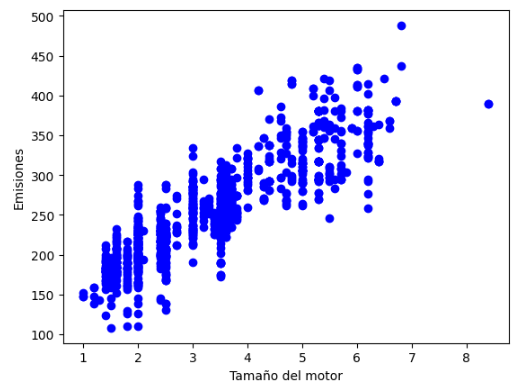

#### Vamos a representar la cilindrada respecto al CO2


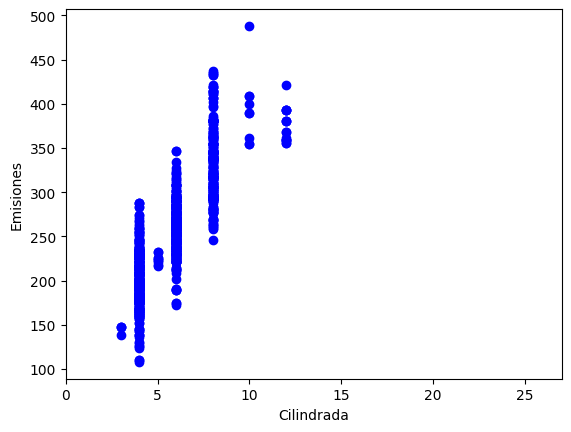

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cilindrada")
plt.ylabel("Emisiones")
plt.xlim(0,27)
plt.show()

### Extracción de las variables de entrada (x) y la variable objetivo
Vamos a practicar usando el tamaño del motor para predecir las emisiones de CO₂ mediante un modelo de regresión lineal.

In [ ]:
# Indicamos que la variable x va a ser el tamaño del motor.
# to_numpy() convierte una columna en un array de numpy que es más eficiente para los cálculos matemáticos.
X = cdf.ENGINESIZE.to_numpy()
# Indicamos que y van a ser las emisiones de CO2.
y = cdf.CO2EMISSIONS.to_numpy()

#### Crear los datasets de entrenamiento y prueba.
Para construir un modelo de regresión lineal que prediga las emisiones de CO₂, es importante evaluar lo bien que funciona con datos nuevos. Para ello, se divide el conjunto de datos en dos partes:

- Conjunto de entrenamiento: se usa para enseñar al modelo cómo relacionar las variables.
- Conjunto de prueba: se usa para verificar si el modelo puede hacer buenas predicciones con datos que no ha visto antes.

Para dividir los datos: Se recomienda dividir los datos de forma aleatoria, usando por ejemplo:

- 80% para entrenamiento
- 20% para prueba

Este porcentaje puede variar según el tamaño del conjunto de datos:

Si tienes pocos datos, necesitas usar más para entrenar (por ejemplo, 90%) para evitar que el modelo aprenda patrones falsos.
Pero si usas muy pocos datos para test, la evaluación del modelo será menos confiable.

En resumen: cuantos más datos tengas, mejor será tanto el entrenamiento como la evaluación.


In [ ]:
# Importamos la librería necesaria para dividir la muestra
from sklearn.model_selection import train_test_split

# Creamos las variables X (entrenamiento y test) e Y (entrenamiento y test)
# Habrá un 20% de registros que serán test. random_state se incluye para que los resultados sean replicables.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Las variables serán arrays de numpy.


In [ ]:
# Comprobamos los datos de entrenamiento (tipo de dato y tamaño)
type(X_train), np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

(numpy.ndarray, (853,), (214,), (853,), (214,))

Podemos ver que son arrays de numpy y que el número de registros de entrenamiento son 853 tanto en x como en y.

Los registros de test son 214 en x y en y.

### Construye tu modelo de regresión lineal simple.

Usaremos scikit-learn.


In [ ]:
# Importamos el modelo lineal de la librería scikit-learn
from sklearn import linear_model

# Creamos la variable
regresion = linear_model.LinearRegression()

# entrenamos el modelo
# X_train es un array de numpy, pero los modelos de sklearn necesitan arrays de dos dimensiones para entrenar los datos, con forma: (n_observacions, n_características)
# reshape(-1,1) convierte el array de una sola dimensión en una matriz de una columna, donde cada fila es una observación.
regresion.fit(X_train.reshape(-1, 1), y_train)

# Imprimimos los coeficientes:
print ('Coeficiente (pendiente): ', regresion.coef_[0]) # En la regresión lineal simple solo hay uno.
print ('Intersección con x: ',regresion.intercept_)

Coeficiente (pendiente):  38.992978724434074
Intersección con x:  126.28970217408721


- El coeficiente (también llamado pendiente) indica cuánto cambia la variable de salida (y) por cada unidad que cambia la variable de entrada (x).
- La intersección (también llamada ordenada al origen) es el valor de y cuando x es cero.

Estos dos valores definen la recta de mejor ajuste que realiza nuestro modelo basandose en los datos de entrenamiento.

Esa recta representa la relación matemática entre la variable de entrada (el tamaño del motor) y la variable de salida (las emisiones de CO₂).

### Visualizamos los resultados del modelo


Puedes visualizar el ajuste del modelo con los datos de entrenamiento trazando la línea sobre los datos.
El modelo de regresión es la línea definida por:

image.png


Text(0, 0.5, 'Emisiones')

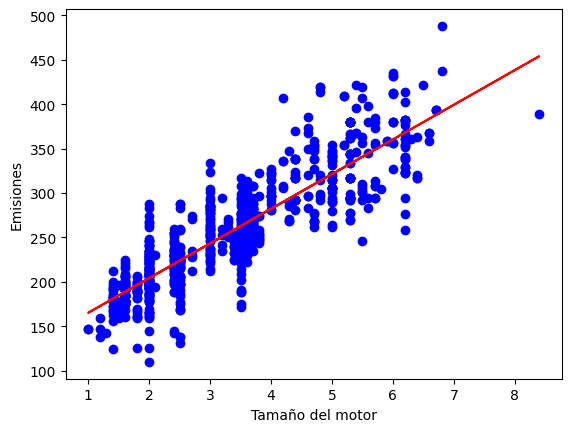

In [ ]:
# Realizamos el gráfico de dispersión con los datos de entrenamiento.
plt.scatter(X_train, y_train,  color='blue')

# Trazamos la línea de regresión ajustada sobre los datos.
# Esta línea representa el modelo: y = coeficiente * x + intersección
plt.plot(X_train, regresion.coef_ * X_train + regresion.intercept_, '-r')
# Creamos las etiquetas del gráfico
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisiones")

#### Evaluación del modelo
Puedes comparar los valores reales con los valores predichos para calcular la precisión de un modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre las áreas que requieren mejora.

Existen diferentes métricas para evaluar modelos. Usemos el MSE aquí para calcular la precisión de nuestro modelo basado en el conjunto de prueba:

- Error Absoluto Medio (MAE): Es el promedio del valor absoluto de los errores. Es la métrica más fácil de entender, ya que simplemente representa el error promedio.

- Error Cuadrático Medio (MSE): Es el promedio del cuadrado de los errores. De hecho, es la métrica que utiliza el modelo para encontrar la línea de mejor ajuste, y por eso también se le llama suma residual de los cuadrados.

- Raíz del Error Cuadrático Medio (RMSE): El RMSE transforma el MSE a las mismas unidades que las variables que se están comparando, lo que puede facilitar su interpretación.

- R-cuadrado (R²): No es un error, sino una métrica popular utilizada para estimar el rendimiento de un modelo de regresión. Representa lo cerca que están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor de R², mejor se ajusta el modelo a los datos. La mejor puntuación posible es 1.0, y puede ser negativa (porque el modelo puede ser arbitrariamente peor).


In [ ]:
# Importamos las métricas desde scikit-learn:
# - mean_absolute_error: Error absoluto medio (MAE)
# - mean_squared_error: Error cuadrático medio (MSE)
# - r2_score: Coeficiente de determinación R²
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Usamos el modelo de regresión previamente entrenado para hacer predicciones sobre el conjunto de prueba (X_test).
# reshape(-1,1) asegura que X_test tenga el formato correcto (matriz columna) para el modelo.
y_test_ = regresion.predict(X_test.reshape(-1,1))


# Evaluamos el rendimiento del modelo con diferentes métricas:

# Imprime el Error Absoluto Medio: promedio de las diferencias absolutas entre los valores reales y los predichos.
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
# Imprime el Error Cuadrático Medio: promedio de los cuadrados de las diferencias entre los valores reales y los predichos.
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
# Imprime la Raíz del Error Cuadrático Medio: raíz cuadrada del MSE, útil porque tiene las mismas unidades que la variable objetivo.
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
# Imprime el R²: indica qué proporción de la varianza en los datos es explicada por el modelo.
print("R2-score: %.2f" % r2_score(y_test, y_test_))


Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


#### Representamos gráficamente el resultado del modelo de regresión sobre los datos de prueba en lugar de los datos de entrenamiento.

Text(0, 0.5, 'Emisiones')

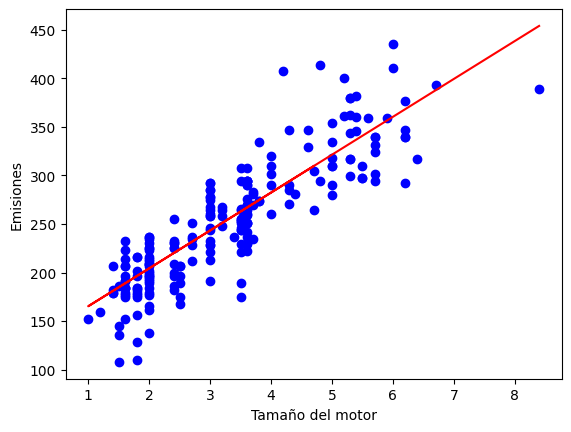

In [ ]:

# Representa los datos de prueba como puntos azules en un diagrama de dispersión.
# Cada punto representa una observación real del conjunto de prueba (X_test, y_test).
plt.scatter(X_test, y_test, color='blue')

# Dibuja la línea de regresión predicha por el modelo.
# Se calcula usando la fórmula de la recta: y = coeficiente * x + intercepto.
# Esta línea muestra las predicciones del modelo sobre los datos de prueba.
plt.plot(X_test, regresion.coef_ * X_test + regresion.intercept_, '-r')

# Etiqueta del eje X: en este caso, el tamaño del motor.
plt.xlabel("Tamaño del motor")

# Etiqueta del eje Y: en este caso, las emisiones.
plt.ylabel("Emisiones")


### Seleccionamos la característica de consumo de combustible (FUELCONSUMPTION_COMB) del dataframe y dividimos los datos en un 80 % para entrenamiento y un 20 % para prueba.
Utilizamos el mismo valor de random state que antes para poder hacer una comparación objetiva con el resultado del entrenamiento anterior.


In [ ]:
# Indicamos que ahora X va a ser el consumo de gasolina.
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

# Creamos la división otra vez, teniendo en cuenta que ahora X es otra cosa.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


### Entrenamos un modelo de regresión lineal utilizando los datos de entrenamiento que creamos.
Transformamos la característica unidimensional en un arreglo bidimensional.


In [ ]:
# Creamos una instancia del modelo de regresión lineal
regr = linear_model.LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
# X_train es un array unidimensional, pero los modelos de scikit-learn esperan una matriz 2D con forma (n_observaciones, n_características).
# Por eso, usamos reshape(-1, 1) para convertirlo en una matriz columna. El -1 permite que Python infiera automáticamente el número de filas.
regr.fit(X_train.reshape(-1, 1), y_train)

# Mostramos los coeficientes del modelo
print('Coeficiente: ', regr.coef_[0])  # En una regresión lineal simple solo hay un coeficiente, por eso lo extraemos directamente.
print('Intersección con x: ', regr.intercept_)  # Este es el valor donde la línea de regresión cruza el eje Y.

Coeficiente:  16.180900781199195
Intersección con x:  69.10302617988444


### Usamos el modelo para hacer predicciones del consumo de gasolina en los datos de test.


In [ ]:
# Usamos el modelo entrenado (regr) para hacer predicciones sobre los datos de prueba.
# Al igual que antes, transformamos X_test en una matriz columna con reshape(-1, 1) para que tenga el formato adecuado.
y_test_ = regr.predict(X_test.reshape(-1,1))

### Calculamos e imprimimos el error cuadrático medio (MSE) de las predicciones del test.


In [ ]:
# Evaluamos el rendimiento del modelo calculando el Error Cuadrático Medio (MSE).
# Esta métrica mide el promedio de los errores al cuadrado entre los valores reales y los predichos.
# Un valor más bajo indica un mejor ajuste del modelo.
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))

Mean squared error: 797.43


Como podríamos esperar a partir del análisis exploratorio, el MSE es menor cuando entrenamos usando el gasto de gasolina en lugar de el tamaño del motor.

Esto implica que, al comparar los dos modelos de regresión lineal —uno que usa el tamaño del motor como variable independiente y otro que usa el gasto de gasolina (fuel consumption)—, el modelo que utiliza el gasto de gasolina ajusta mejor los datos.

Esto se concluye porque su Error Cuadrático Medio (MSE) es menor, lo que significa que las predicciones del modelo están más cerca de los valores reales.
#### ¿Qué significa esto en términos prácticos?

El gasto de gasolina tiene una relación más directa o fuerte con las emisiones de CO₂ que el tamaño del motor. Por tanto, usar el consumo como variable predictora permite al modelo hacer estimaciones más precisas.